# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/blop/dofs.py:165: UserWarning: No type was specified for DOF brownian1. Assuming type=continuous.
  warnings.warn(f"No type was specified for DOF {self.name}. Assuming type={self.type}.")
/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/blop/dofs.py:165: UserWarning: No type was specified for DOF brownian2. Assuming type=continuous.
  warnings.warn(f"No type was specified for DOF {self.name}. Assuming type={self.type}.")


running iteration 1 / 1


Transient Scan ID: 1     Time: 2024-09-26 23:34:23
Persistent Unique Scan ID: '611c7a01-5b86-470a-b15b-8268f9530821'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |  brownian2 |  brownian1 |         x3 |
+-----------+------------+------------+------------+------------+------------+------------+
|         1 | 23:34:23.4 |     -0.279 |      0.110 |     -0.038 |      0.001 |      0.000 |


|         2 | 23:34:24.0 |      0.888 |     -1.773 |      0.217 |      0.195 |      0.000 |


|         3 | 23:34:24.5 |      1.763 |     -3.374 |      0.066 |     -0.167 |      0.000 |


|         4 | 23:34:25.0 |      3.175 |     -4.339 |      0.061 |      0.051 |      0.000 |


|         5 | 23:34:25.5 |      4.174 |     -0.788 |      0.505 |     -0.073 |      0.000 |


|         6 | 23:34:26.0 |      1.923 |      1.093 |      0.475 |      0.045 |      0.000 |


|         7 | 23:34:26.5 |      3.022 |      1.355 |      0.246 |      0.451 |      0.000 |


|         8 | 23:34:27.0 |      4.640 |      3.498 |      0.131 |      0.530 |      0.000 |


|         9 | 23:34:27.5 |      0.415 |      3.780 |      0.243 |      0.710 |      0.000 |


|        10 | 23:34:28.1 |     -2.372 |      4.763 |      0.354 |      0.656 |      0.000 |


|        11 | 23:34:28.6 |     -2.533 |      2.525 |      0.339 |      0.668 |      0.000 |


|        12 | 23:34:29.1 |     -4.816 |      2.329 |      0.175 |      0.624 |      0.000 |


|        13 | 23:34:29.6 |     -3.624 |     -0.508 |      0.356 |      0.016 |      0.000 |


|        14 | 23:34:30.1 |     -1.275 |     -2.043 |      0.474 |     -0.308 |      0.000 |


|        15 | 23:34:30.6 |     -1.064 |     -3.103 |      0.429 |     -0.159 |      0.000 |


|        16 | 23:34:31.0 |     -4.037 |     -4.619 |      0.341 |     -0.436 |      0.000 |


+-----------+------------+------------+------------+------------+------------+------------+
generator list_scan ['611c7a01'] (scan num: 1)


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer


trained model 'himmelblau' in 68 ms


('611c7a01-5b86-470a-b15b-8268f9530821',)

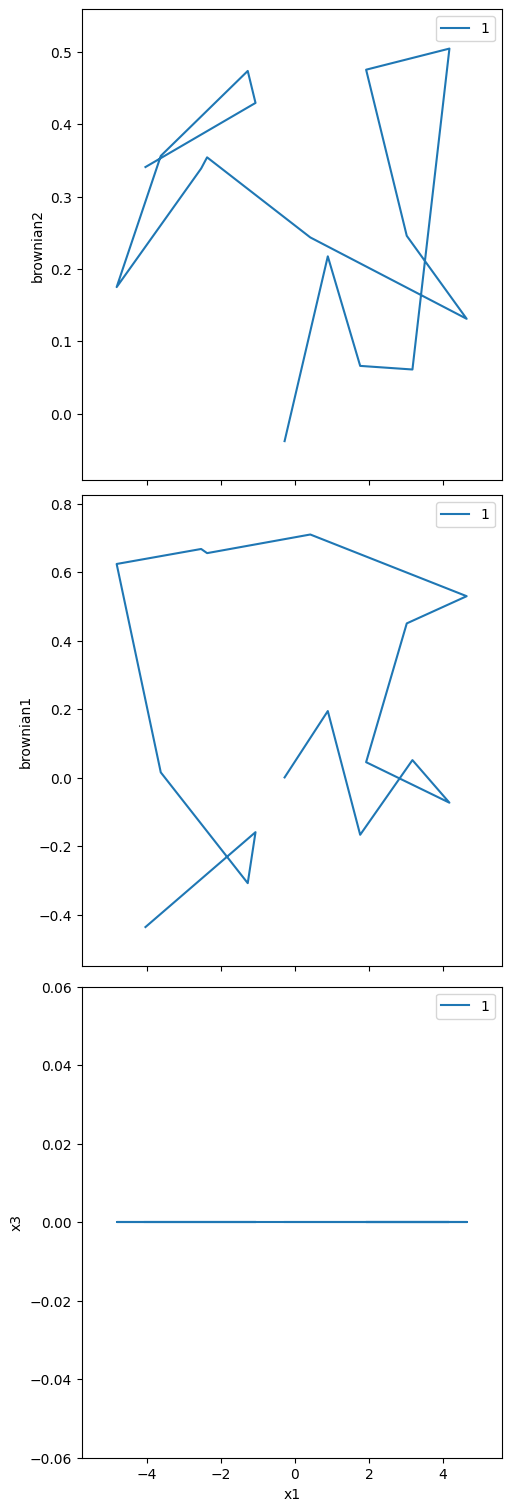

In [2]:
from blop.digestion.tests import constrained_himmelblau_digestion
from blop import DOF, Agent, Objective
from blop.dofs import BrownianMotion


dofs = [
    DOF(name="x1", search_domain=(-5.0, 5.0)),
    DOF(name="x2", search_domain=(-5.0, 5.0)),
    DOF(name="x3", search_domain=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

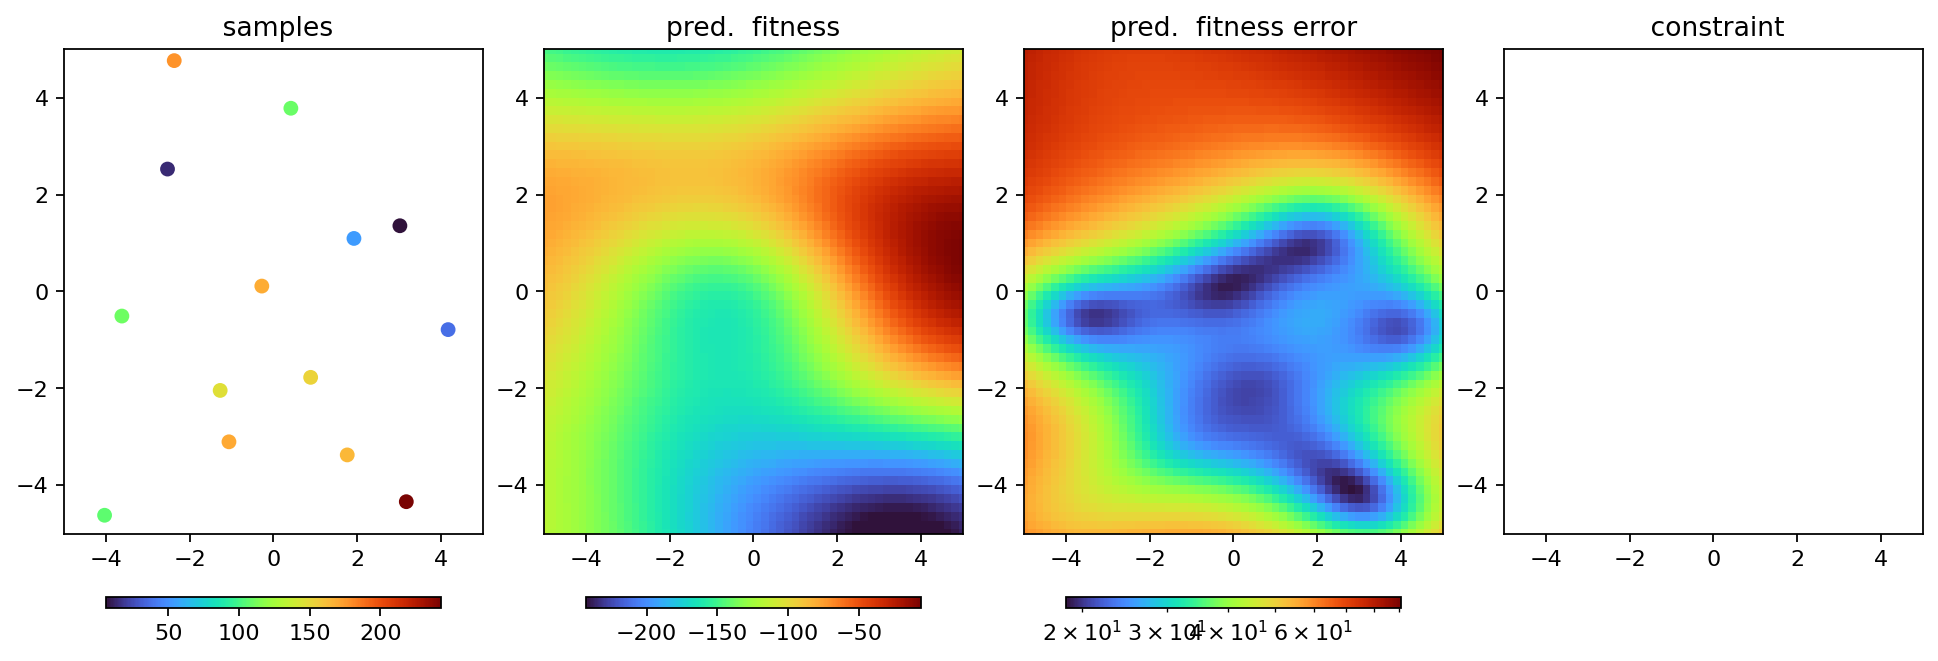

In [3]:
agent.plot_objectives()